In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://medium.com/@somilshah112/how-to-find-duplicate-or-similar-images-quickly-with-python-2d636af9452f


In [67]:
df=pd.read_csv('../input/petfinder-pawpularity-score/train.csv')

In [68]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [69]:
df["img"] = df["Id"].apply(lambda x:x+ ".jpg")

In [70]:
df=df[['img', 'Pawpularity']]

In [71]:
df[df['Pawpularity']>=90]

,img,Pawpularity
15,0067aaaa500b530c76b9c91af34b4cb8.jpg,98
19,00768659c1c90409f81dcdecbd270513.jpg,100
44,0117f444e6118619c4f6492cba703177.jpg,95
50,013f86ed0e765b189990d3d5ac28bd7d.jpg,100
86,0254f54b148543442373d5aad45b2d1a.jpg,100
...,...,...
9797,fce5c86414b1c60b7af20ddbb8510d83.jpg,94
9836,fde75ba22f491d31c9267e59f6cbfe1a.jpg,100
9843,fe200aff478f55ca4bcf77d9dade1217.jpg,100
9873,feb371403a5f656fd8a0ca434d845f2d.jpg,96


In [72]:
df[df['Pawpularity']<90]

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


# Cleaning

## Delete duplicates

In [73]:
import os
from PIL import Image
import imagehash


In [74]:
TRAIN_PATH='../input/petfinder-pawpularity-score/train'

In [75]:
images_names=os.listdir(TRAIN_PATH)

In [76]:
hashes={}
duplicates=[]

In [77]:
for image in images_names:
    with Image.open(os.path.join(TRAIN_PATH, image)) as img:
        temp_hash = imagehash.average_hash(img, 10)
        if temp_hash in hashes:
            print('Found')
            duplicates.append(image)
        else:
            hashes[temp_hash]=image

Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found
Found


In [78]:
duplicates_2=[]

DUPLICATES
                                       img  Pawpularity
7633  c504568822c53675a4f425c8e5800a36.jpg           40
                                       img  Pawpularity
3503  5a642ecc14e9c57a05b8e010414011f2.jpg           37


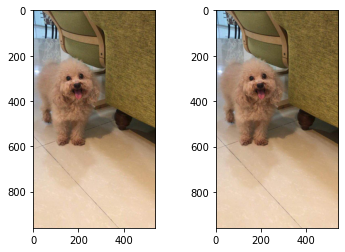

DUPLICATES
                                       img  Pawpularity
4077  67e97de8ec7ddcda59a58b027263cdcc.jpg           64
                                       img  Pawpularity
3721  5ef7ba98fc97917aec56ded5d5c2b099.jpg           47


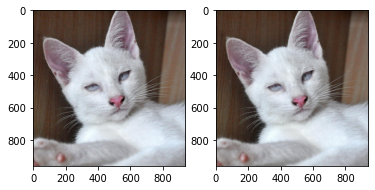

DUPLICATES
                                       img  Pawpularity
5596  902786862cbae94e890a090e5700298b.jpg           23
                                       img  Pawpularity
2197  3877f2981e502fe1812af38d4f511fd2.jpg           15


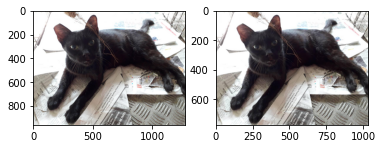

DUPLICATES
                                       img  Pawpularity
4186  6ae42b731c00756ddd291fa615c822a1.jpg           21
                                       img  Pawpularity
2622  43bd09ca68b3bcdc2b0c549fd309d1ba.jpg           49


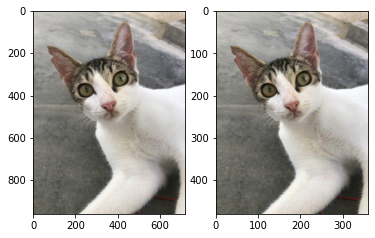

DUPLICATES
                                       img  Pawpularity
8672  e09a818b7534422fb4c688f12566e38f.jpg           53
                                       img  Pawpularity
6871  b148cbea87c3dcc65a05b15f78910715.jpg           43


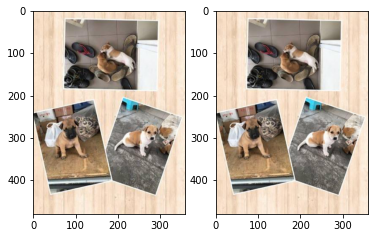

DUPLICATES
                                       img  Pawpularity
7428  bf8501acaeeedc2a421bac3d9af58bb7.jpg           27
                                      img  Pawpularity
303  08440f8c2c040cf2941687de6dc5462f.jpg           28


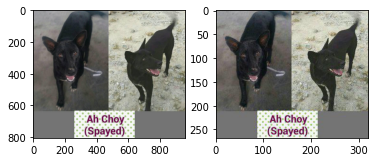

DUPLICATES
                                       img  Pawpularity
5944  9a0238499efb15551f06ad583a6fa951.jpg           21
                                       img  Pawpularity
2619  43ab682adde9c14adb7c05435e5f2e0e.jpg           35


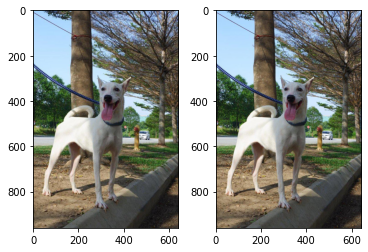

DUPLICATES
                                     img  Pawpularity
52  01430d6ae02e79774b651175edd40842.jpg           28
                                       img  Pawpularity
4308  6dc1ae625a3bfb50571efedc0afc297c.jpg           48


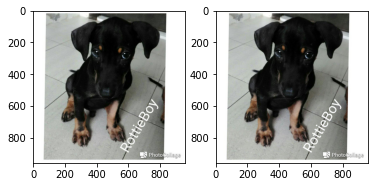

DUPLICATES
                                       img  Pawpularity
4118  68e55574e523cf1cdc17b60ce6cc2f60.jpg           23
                                       img  Pawpularity
5992  9b3267c1652691240d78b7b3d072baf3.jpg           22


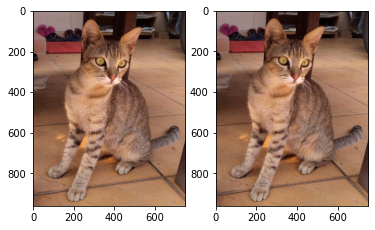

DUPLICATES
                                       img  Pawpularity
3662  5da97b511389a1b62ef7a55b0a19a532.jpg           42
                                       img  Pawpularity
5587  8ffde3ae7ab3726cff7ca28697687a42.jpg           23


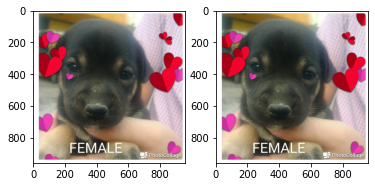

DUPLICATES
                                       img  Pawpularity
8778  e313824cc0afb1f6debd09e2da7d8803.jpg           21
                                       img  Pawpularity
5701  93752c03c7160d45ac332f9f52717876.jpg           18


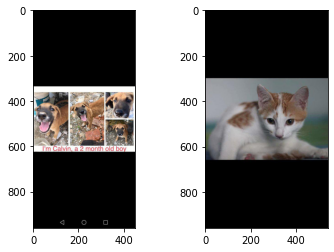

DUPLICATES
                                      img  Pawpularity
781  13d215b4c71c3dc603cd13fc3ec80181.jpg           58
                                       img  Pawpularity
2145  373c763f5218610e9b3f82b12ada8ae5.jpg           71


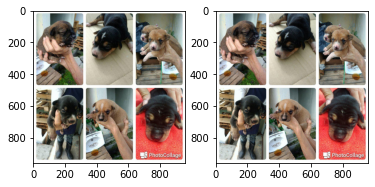

DUPLICATES
                                      img  Pawpularity
926  175750d5b21722b7451361df8852e374.jpg           50
                                       img  Pawpularity
5701  93752c03c7160d45ac332f9f52717876.jpg           18


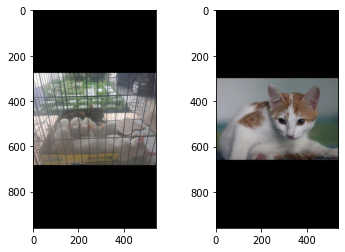

DUPLICATES
                                       img  Pawpularity
8533  dd042410dc7f02e648162d7764b50900.jpg           31
                                       img  Pawpularity
3500  5a5c229e1340c0da7798b26edf86d180.jpg           38


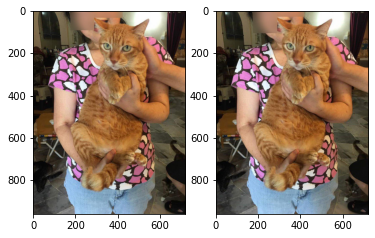

DUPLICATES
                                      img  Pawpularity
132  03d82e64d1b4d99f457259f03ebe604d.jpg           38
                                       img  Pawpularity
8484  dbc47155644aeb3edd1bd39dba9b6953.jpg           34


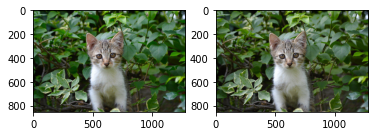

DUPLICATES
                                       img  Pawpularity
8038  d050e78384bd8b20e7291b3efedf6a5b.jpg           57
                                       img  Pawpularity
5279  87c6a8f85af93b84594a36f8ffd5d6b8.jpg           56


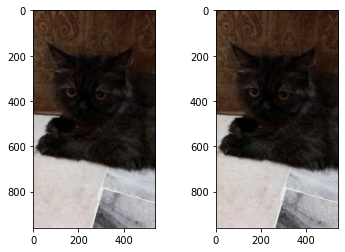

DUPLICATES
                                      img  Pawpularity
462  0c4d454d8f09c90c655bd0e2af6eb2e5.jpg           40
                                       img  Pawpularity
9849  fe47539e989df047507eaa60a16bc3fd.jpg            3


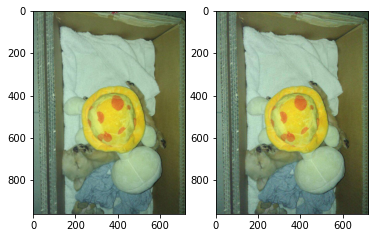

DUPLICATES
                                       img  Pawpularity
6558  a9513f7f0c93e179b87c01be847b3e4c.jpg           30
                                       img  Pawpularity
7166  b86589c3e85f784a5278e377b726a4d4.jpg           39


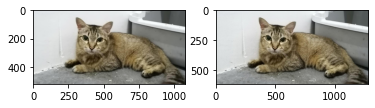

In [79]:
for img in duplicates:
    fig,ax = plt.subplots(ncols=2,nrows=1)
    print('DUPLICATES')
    print(df[df['img']==img])
    img=Image.open(os.path.join(TRAIN_PATH, img))
    ax[0].imshow(img)
    #pyplot.show()
    temp_hash = imagehash.average_hash(img, 10)
    for i in hashes:
        if temp_hash==i:
            img_dup=hashes[i]
            print(df[df['img']==img_dup])
            duplicates_2.append(img_dup)
            img_dup=Image.open(os.path.join(TRAIN_PATH, img_dup))
            ax[1].imshow(img_dup)
            #pyplot.imshow(img_dup)
            plt.show()
        

In [80]:
#for duplicate in duplicates:
#    os.remove(os.path.join(TRAIN_PATH,duplicate))
    #print("{} Deleted Succesfully!".format(duplicate))

In [81]:
df=df.loc[~df['img'].isin(duplicates)]

In [82]:
df=df.loc[~df['img'].isin(duplicates_2)]

In [83]:
df

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


In [84]:
df.index=np.arange(0,9877)

## Delete outliners

In [85]:
import seaborn as sns

In [86]:
h=[]
w=[]
for img in df.img:
    pic=Image.open('../input/petfinder-pawpularity-score/train/'+img)
    h.append(pic.size[0])
    w.append(pic.size[1])
df['h']=h
df['w']=w

<AxesSubplot:xlabel='h'>

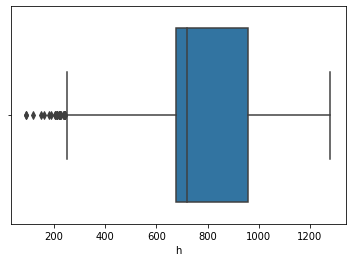

In [87]:
sns.boxplot(x=df['h'])

<AxesSubplot:xlabel='w'>

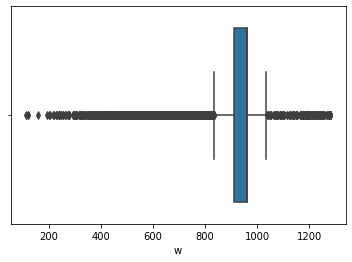

In [88]:
sns.boxplot(x=df['w'])

In [89]:
from scipy import stats
z_h = np.abs(stats.zscore(df['h']))
print(z_h)
z_w = np.abs(stats.zscore(df['w']))
print(z_w)

0       1.478745
1       0.842015
2       0.312813
3       1.478745
4       0.979060
          ...   
9872    0.068522
9873    0.312813
9874    0.401646
9875    0.312813
9876    0.979060
Name: h, Length: 9877, dtype: float64
0       1.176550
1       0.832078
2       0.354434
3       1.176550
4       0.354434
          ...   
9872    0.354434
9873    0.354434
9874    0.053828
9875    0.354434
9876    0.354434
Name: w, Length: 9877, dtype: float64


In [90]:
outliners=np.where(z_w > 3)

In [91]:
df=df.drop(outliners[0], axis='index')

In [92]:
df=df[['img','Pawpularity']]

In [93]:
df.index=np.arange(0,9709)

In [94]:
df_new=df.copy()

Let's drop images with Pawpularity = 100

In [95]:
#df_new.drop(df[df_new['Pawpularity']==100].index, inplace=True) 

In [96]:
#df_new.index=np.arange(0,9423)

In [97]:
df_new.loc[(df_new.Pawpularity<100), 'Pawpularity']=0

In [98]:
df_new.loc[(df_new.Pawpularity==100), 'Pawpularity']=1

In [99]:
#df_new.loc[(df_new.Pawpularity<100), 'Pawpularity']=0

In [100]:
df_new

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,0
1,0009c66b9439883ba2750fb825e1d7db.jpg,0
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0
4,001dc955e10590d3ca4673f034feeef2.jpg,0
...,...,...
9704,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0
9705,ffcc8532d76436fc79e50eb2e5238e45.jpg,0
9706,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0
9707,fff19e2ce11718548fa1c5d039a5192a.jpg,0


In [101]:
#df_new.loc[(df_new.Pawpularity>=50), 'Pawpularity']=1

In [102]:
df_1=df_new[df_new['Pawpularity']==0].head(2000)

In [103]:
df_2=df_new[df_new['Pawpularity']==1]#.head(1000)

In [104]:
df_sum=pd.concat([df_1, df_2])

In [105]:
df_sum=df_sum.sample(frac=1)

In [106]:
df_sum

,img,Pawpularity
962,19099e8dfcdd866c74e43612d8a0159d.jpg,0
510,0dcd90c1b35f99525891ad941315e6f5.jpg,0
1265,214c7636de0fcbe5bfb1aa3f785e42f9.jpg,0
184,053d215699033aa37c5238412eb079d0.jpg,0
552,0ecffe437b3316acf00a8a074bd63a5d.jpg,0
...,...,...
755,13a33de49e8a0e3f7162b05a3b41dfd8.jpg,0
8180,d82afe0c787d654fc4a7be069e8cba9b.jpg,1
788,14417336de58c9160fd7d0c14fce9e62.jpg,0
497,0d60793ae00c0d85f7a115b093126794.jpg,0


In [107]:
df_sum.index=np.arange(0,2286)

In [108]:
df_sum

,img,Pawpularity
0,19099e8dfcdd866c74e43612d8a0159d.jpg,0
1,0dcd90c1b35f99525891ad941315e6f5.jpg,0
2,214c7636de0fcbe5bfb1aa3f785e42f9.jpg,0
3,053d215699033aa37c5238412eb079d0.jpg,0
4,0ecffe437b3316acf00a8a074bd63a5d.jpg,0
...,...,...
2281,13a33de49e8a0e3f7162b05a3b41dfd8.jpg,0
2282,d82afe0c787d654fc4a7be069e8cba9b.jpg,1
2283,14417336de58c9160fd7d0c14fce9e62.jpg,0
2284,0d60793ae00c0d85f7a115b093126794.jpg,0


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [110]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [111]:
training, validation = train_test_split(df_sum, test_size = 0.25, random_state=17)

In [112]:
X_train=training['img']
X_val=validation['img']
y_train=training['Pawpularity']
y_val=validation['Pawpularity']

In [113]:
class PetfinderDataset(Dataset):
    def __init__(self, dataframe, data_path, transform=None, target_transform=None):
        self.dataframe=dataframe
        self.data_path=data_path
        self.transform=transform
        self.target_transform=target_transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name=self.dataframe['img'].iloc[idx]
        img=Image.open(os.path.join(self.data_path, img_name))
        img=self.transform(img)
        label=self.dataframe['Pawpularity'].iloc[idx]
        return img, label

In [114]:
image_size = 224 

transform = transforms.Compose([
    transforms.Resize(image_size), 
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])



In [115]:
dataset_train = PetfinderDataset(training, TRAIN_PATH, transform=transform)
dataloader_train = DataLoader(dataset_train, batch_size=4)
dataset_val=PetfinderDataset(validation, TRAIN_PATH, transform=transform)
dataloader_val=DataLoader(dataset_val, batch_size=4)

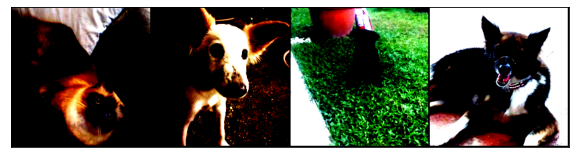

In [116]:
from torchvision.utils import make_grid

for images, labels in dataloader_train:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

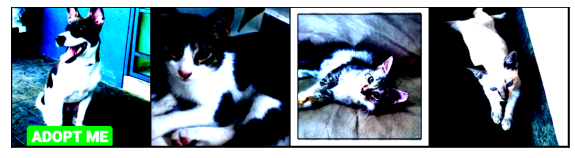

In [117]:
for images, labels in dataloader_val:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [118]:
from torchvision import models


In [119]:
pip install pretrainedmodels

Note: you may need to restart the kernel to use updated packages.


In [120]:
import pretrainedmodels

In [134]:
resnet = models.resnet18(pretrained=True)
#resnet=resnet(include_top=False, weights='imagenet')

In [135]:

num_ftrs = resnet.fc.in_features
print(num_ftrs)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#resnet.fc = nn.Linear(num_ftrs, 2)

resnet.fc = nn.Sequential(
    nn.Linear(num_ftrs, 2, bias = True),
    nn.Sigmoid()
)


512


In [136]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [124]:
#CUDA_LAUNCH_BLOCKING=1.

In [137]:
#CUDA_LAUNCH_BLOCKING=1
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    resnet.cuda()   
        

In [138]:
import torch.optim as optim

# specify loss function
criterion = torch.nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(resnet.parameters(), lr = 0.001)

In [139]:
def accuracy(preds, trues):
    ### Converting preds to 0 or 1

    preds = [0 if preds[i][0]>=preds[i][1] else 1 for i in range(len(preds))]
    ### Calculating accuracy by comparing predictions with true labels
    acc = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    ### Summing over all correct predictions
    acc = np.sum(acc) / len(preds)
    #print(acc)
    return (acc * 100)
    #return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [140]:
import sklearn.metrics

In [149]:
def other_metrics(preds,trues):
    #print(preds)

    y_pred = [0 if preds[i][0]>=preds[i][1] else 1 for i in range(len(preds))]
    #y_pred = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    
    #y_pred = np.array(y_pred)# List to Numpy.Arra
    #y_pred = torch.from_numpy(y_pred) # array2tensor
    #y_pred.get_device()
    #y_pred.cuda()
    #print(y_pred)
    #print(trues)
    trues= trues.to('cpu').numpy()
    #trues=trues.cpu()
    #print(trues)
    #print(y_pred)
    
    
    r=sklearn.metrics.confusion_matrix(trues, y_pred)
    precision = sklearn.metrics.precision_score(trues, y_pred)
    recall = sklearn.metrics.recall_score(trues, y_pred)
    
    return r, precision, recall 

In [150]:
n_epochs = 10
valid_loss_min=np.Inf
train_loss_list=[]
val_loss_list=[]

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    
    resnet.train()
    for data, target in dataloader_train:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = resnet(data)
        #print(output)
        loss = criterion(output, target)
        acc_train=accuracy(output, target)
        matrix_tr, precision_tr, recall_tr=other_metrics(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
        
    resnet.eval()
    
    for data, target in dataloader_val:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = resnet(data)
        loss = criterion(output, target)
        acc_val=accuracy(output, target)
        matrix_val, precision_val, recall_val=other_metrics(output, target)
        valid_loss += loss.item()*data.size(0)
        
    
    train_loss = train_loss/len(dataloader_train.dataset)
    train_loss_list.append(train_loss)
    valid_loss = valid_loss/len(dataloader_val.dataset)
    val_loss_list.append(valid_loss)

    
    print('Epoch: {} \tTraining Loss: {:.6f} \t Training Accuracy: {:.6f} \t Validation Loss: {:.6f} Validation Accuracy: {:.6f}'.format(
        epoch, train_loss, acc_train, valid_loss, acc_val))
    
    print('Train metrics.\n Confusion Matrix:{} \t Precision: {}\t Recall {}'.format( matrix_tr, precision_tr, recall_tr))
    print('Validation metrics.\n Confusion Matrix:{} \t Precision: {}\t Recall {}'.format( matrix_val, precision_val, recall_val))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(resnet.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
    

Epoch: 1 	Training Loss: 0.439428 	 Training Accuracy: 50.000000 	 Validation Loss: 0.446633 Validation Accuracy: 100.000000
Train metrics.
 Confusion Matrix:[[1 0]
 [1 0]] 	 Precision: 0.0	 Recall 0.0
Validation metrics.
 Confusion Matrix:[[4]] 	 Precision: 0.0	 Recall 0.0
Validation loss decreased (inf --> 0.446633).  Saving model ...
Epoch: 2 	Training Loss: 0.438689 	 Training Accuracy: 50.000000 	 Validation Loss: 0.446148 Validation Accuracy: 100.000000
Train metrics.
 Confusion Matrix:[[1 0]
 [1 0]] 	 Precision: 0.0	 Recall 0.0
Validation metrics.
 Confusion Matrix:[[4]] 	 Precision: 0.0	 Recall 0.0
Validation loss decreased (0.446633 --> 0.446148).  Saving model ...
Epoch: 3 	Training Loss: 0.438230 	 Training Accuracy: 50.000000 	 Validation Loss: 0.445828 Validation Accuracy: 100.000000
Train metrics.
 Confusion Matrix:[[1 0]
 [1 0]] 	 Precision: 0.0	 Recall 0.0
Validation metrics.
 Confusion Matrix:[[4]] 	 Precision: 0.0	 Recall 0.0
Validation loss decreased (0.446148 --> 0.

In [151]:
print(train_loss_list)
print(val_loss_list)

[0.4394280288711868, 0.4386894500519876, 0.4382302569814435, 0.4379165785315435, 0.4376883910862401, 0.43751472220815885, 0.4373779778858884, 0.43726739200438475, 0.43717601571923237, 0.437099162102302]
[0.4466326957816011, 0.44614811773066754, 0.4458283756996368, 0.4456012257329234, 0.44543124495686354, 0.4452989814164755, 0.44519296934554625, 0.44510599679046575, 0.44503320347179065, 0.44497123631564056]


In [152]:
def plot_losses(train_losses, val_losses):
    #train_losses = [x.get('train_loss') for x in history]
    #val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

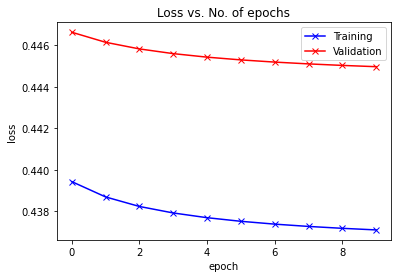

In [153]:
plot_losses(train_loss_list, val_loss_list)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
train_on_gpu = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(3,16,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(16,32,5)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32*53*53, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 2)
        self.softmax = nn.LogSoftmax()
        
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 32 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.softmax(self.fc3(x))
        return x
    
 # create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()   
        